In [ ]:
# Importing tensorflow

import tensorflow as tf

In [ ]:
tf.__version__

'2.5.0'

In [ ]:
!pip install tensorflow-gpu

In [ ]:
# Checking for GPU info
!nvidia-smi

Sat Jun  5 14:29:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Importing required libraries

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization,GlobalAveragePooling2D
import numpy as np
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

# Assign the train and testing data paths and check for label counts

In [5]:
image_size = [224, 224, 3] # fixing the image size
train_path = '/content/drive/MyDrive/brain_mri_data/Training'
valid_path = '/content/drive/MyDrive/brain_mri_data/Testing'

In [15]:
print("Training Data labels and the number of images in it:")
print()
for i in os.listdir(train_path):
    print("Label:",i,"\n","# of Images:",len(os.listdir(train_path+"/"+i)))
    print()

Training Data labels and the number of images in it:

Label: meningioma_tumor 
 # of Images: 822

Label: glioma_tumor 
 # of Images: 826

Label: no_tumor 
 # of Images: 395

Label: pituitary_tumor 
 # of Images: 827



In [16]:
print("Testing Data labels and the number of images in it:")
print()
for i in os.listdir(valid_path):
    print("Label:",i,"\n","# of Images:",len(os.listdir(valid_path+"/"+i)))
    print()

Testing Data labels and the number of images in it:

Label: pituitary_tumor 
 # of Images: 74

Label: glioma_tumor 
 # of Images: 100

Label: meningioma_tumor 
 # of Images: 115

Label: no_tumor 
 # of Images: 105



# Visualize random 5 images from each label

In [66]:
def viz_label(name):
  plt.figure(figsize=(15,15))
  print("Random 5 images of ",name)
  for m in range(5):    
      plt.subplot(1,5,m+1)
      image_folder = train_path+'/'+name
      random_image = np.random.choice(os.listdir(image_folder))
      image_ = plt.imshow(plt.imread(image_folder+"/"+random_image))
  plt.show()

Random 5 images of  pituitary_tumor


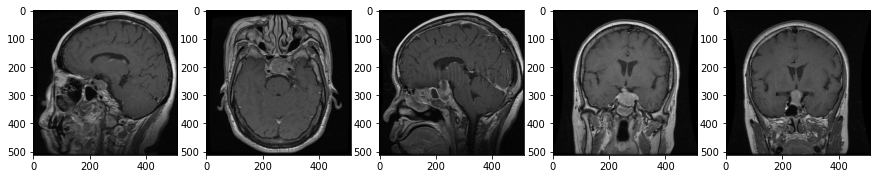

In [57]:
viz_label("pituitary_tumor")

Random 5 images of  glioma_tumor


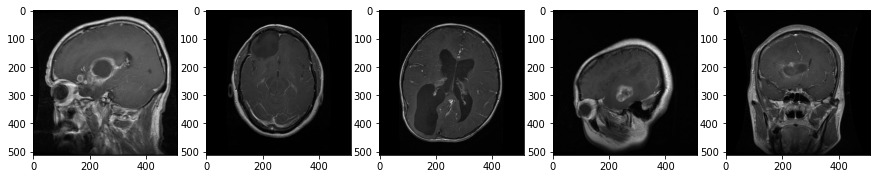

In [58]:
viz_label("glioma_tumor")

Random 5 images of  meningioma_tumor


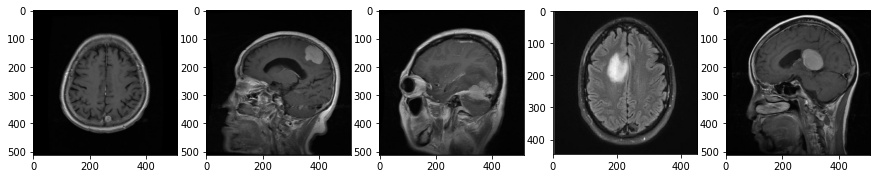

In [59]:
viz_label("meningioma_tumor")

Random 5 images of  no_tumor


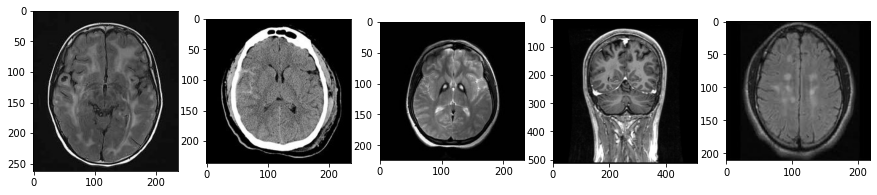

In [65]:
viz_label("no_tumor")

# Importing the training and the testing dataset using datagenerator

In [ ]:
# Augment the training images with normalization to get different versions of images.
# Only rescale the test dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
np.unique(training_set.labels)

array([0, 1, 2, 3], dtype=int32)

## Instantiate MobileNet

In [ ]:
# Instantiating MobileNet Trained model with include_top=False to exclude the top Dense layers in mobnet variable.

mobnet=MobileNet(input_shape=image_size,include_top=False)

In [ ]:
mobnet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
# Freeze the lower convolution layers of the mobnet

mobnet.trainable=False
mobnet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
# Successfully froze the convolution layers.

In [ ]:
#Check which layer is trainable or not

for layer in mobnet.layers:
    print(layer.name,"--------------------------------Trainable:",layer.trainable)

input_2 --------------------------------Trainable: False
conv1 --------------------------------Trainable: False
conv1_bn --------------------------------Trainable: False
conv1_relu --------------------------------Trainable: False
conv_dw_1 --------------------------------Trainable: False
conv_dw_1_bn --------------------------------Trainable: False
conv_dw_1_relu --------------------------------Trainable: False
conv_pw_1 --------------------------------Trainable: False
conv_pw_1_bn --------------------------------Trainable: False
conv_pw_1_relu --------------------------------Trainable: False
conv_pad_2 --------------------------------Trainable: False
conv_dw_2 --------------------------------Trainable: False
conv_dw_2_bn --------------------------------Trainable: False
conv_dw_2_relu --------------------------------Trainable: False
conv_pw_2 --------------------------------Trainable: False
conv_pw_2_bn --------------------------------Trainable: False
conv_pw_2_relu -------------------

In [ ]:
# Take the weights from pre-trained for mobnet model frozen conv2D layers
# Train the dense models where back propagation optimization happens.

transfer_mobnet=Sequential([mobnet,
                          GlobalAveragePooling2D(),
                          Dense(512,activation="relu"),
                          Dense(256,activation="relu"),
                          Dense(4,activation="softmax")
                          ])

transfer_mobnet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 1028      
Total params: 3,886,020
Trainable params: 657,156
Non-trainable params: 3,228,864
_________________________________________________________________


In [ ]:
# Complile

transfer_mobnet.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
# Fit the model

hist=transfer_mobnet.fit(training_set,
                  steps_per_epoch=2870//32,
                  epochs=10,
                  validation_data=test_set,
                  validation_steps=394//32)

Epoch 1/10
89/89 [==============================] - 680s 7s/step - loss: 0.5997 - accuracy: 0.7801 - val_loss: 1.0940 - val_accuracy: 0.7005
Epoch 2/10
89/89 [==============================] - 40s 448ms/step - loss: 0.3004 - accuracy: 0.8820 - val_loss: 0.9846 - val_accuracy: 0.7422
Epoch 3/10
89/89 [==============================] - 39s 442ms/step - loss: 0.2425 - accuracy: 0.9126 - val_loss: 0.9345 - val_accuracy: 0.7422
Epoch 4/10
89/89 [==============================] - 39s 441ms/step - loss: 0.2552 - accuracy: 0.9084 - val_loss: 0.8065 - val_accuracy: 0.7760
Epoch 5/10
89/89 [==============================] - 39s 439ms/step - loss: 0.1704 - accuracy: 0.9369 - val_loss: 1.2513 - val_accuracy: 0.7552
Epoch 6/10
89/89 [==============================] - 39s 439ms/step - loss: 0.2199 - accuracy: 0.9133 - val_loss: 1.3927 - val_accuracy: 0.7578
Epoch 7/10
89/89 [==============================] - 39s 439ms/step - loss: 0.1475 - accuracy: 0.9394 - val_loss: 1.2506 - val_accuracy: 0.7292
E

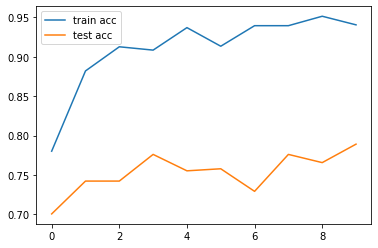

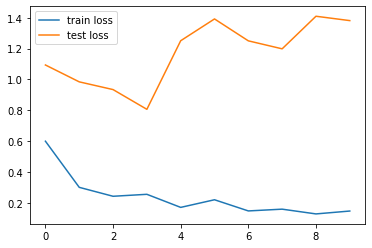

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history["accuracy"],label="train acc")
plt.plot(hist.history["val_accuracy"],label="test acc")
plt.legend()
plt.show()

plt.plot(hist.history["loss"],label="train loss")
plt.plot(hist.history["val_loss"],label="test loss")
plt.legend()
plt.show()

In [ ]:
# There is overfitting on the train data.

# Steps to handle overfitting:

# Introduce regularisation using lambda
# Vary the learning rate of the optimizer
# Add dropout/batchnormalization layer
# Do not use drop out and batch normalization both at once in one layer.
# use either of them.

# Other general options:

# Use call back.
# try different augmentaion options. It increases the generic behaviour.
# try different batch sizes.

In [ ]:
# Model 1 with drop out 20% and call back monitoring val_loss

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
cb=[EarlyStopping(monitor="val_loss",patience=2,mode="min",min_delta=0.01)]

In [ ]:
transfer_mobnet1=Sequential([mobnet,
                          GlobalAveragePooling2D(),
                          Dense(512,activation="relu"),
                          Dropout(0.2),
                          Dense(256,activation="relu"),
                          Dropout(0.2),
                          Dense(4,activation="softmax")
                          ])

In [ ]:
transfer_mobnet1.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
hist1=transfer_mobnet1.fit(training_set,
                  steps_per_epoch=2870//32,
                  epochs=20,
                  batch_size=16,
                  validation_data=test_set,
                  validation_steps=394//32,
                  callbacks=[cb])

Epoch 1/20
89/89 [==============================] - 40s 453ms/step - loss: 0.2095 - accuracy: 0.9228 - val_loss: 1.2256 - val_accuracy: 0.7604
Epoch 2/20
89/89 [==============================] - 40s 446ms/step - loss: 0.1793 - accuracy: 0.9313 - val_loss: 1.1436 - val_accuracy: 0.7995
Epoch 3/20
89/89 [==============================] - 40s 444ms/step - loss: 0.1804 - accuracy: 0.9345 - val_loss: 1.2235 - val_accuracy: 0.7448
Epoch 4/20
89/89 [==============================] - 40s 444ms/step - loss: 0.1717 - accuracy: 0.9338 - val_loss: 1.1521 - val_accuracy: 0.7682


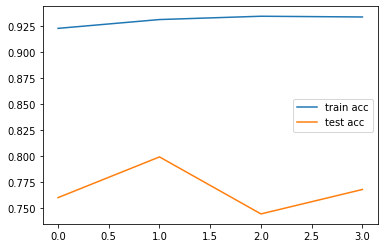

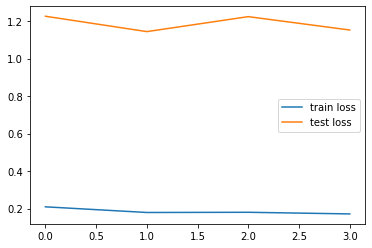

In [ ]:
plt.plot(hist1.history["accuracy"],label="train acc")
plt.plot(hist1.history["val_accuracy"],label="test acc")
plt.legend()
plt.show()

plt.plot(hist1.history["loss"],label="train loss")
plt.plot(hist1.history["val_loss"],label="test loss")
plt.legend()
plt.show()

In [ ]:
# Performance is almost similar. Let us try other options.

In [ ]:
# Model 2 with Flatten() and BatchNormalization

In [ ]:
transfer_mobnet2=Sequential([mobnet,
                          Flatten(),
                          Dense(256,activation="relu"),
                          BatchNormalization(),
                          Dense(4,activation="softmax")
                          ])

In [ ]:
transfer_mobnet2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
cb1=[EarlyStopping(monitor="val_loss",patience=2,mode="min",min_delta=0.001)]
hist2=transfer_mobnet2.fit(training_set,
                  steps_per_epoch=2870//32,
                  epochs=20,
                  batch_size=16,
                  validation_data=test_set,
                  validation_steps=394//32,
                  callbacks=[cb1])

Epoch 1/20
89/89 [==============================] - 40s 452ms/step - loss: 0.0625 - accuracy: 0.9778 - val_loss: 1.4357 - val_accuracy: 0.7682
Epoch 2/20
89/89 [==============================] - 40s 451ms/step - loss: 0.0712 - accuracy: 0.9753 - val_loss: 1.3545 - val_accuracy: 0.7969
Epoch 3/20
89/89 [==============================] - 40s 449ms/step - loss: 0.0589 - accuracy: 0.9799 - val_loss: 1.3131 - val_accuracy: 0.7969
Epoch 4/20
89/89 [==============================] - 40s 448ms/step - loss: 0.0560 - accuracy: 0.9813 - val_loss: 1.2904 - val_accuracy: 0.7969
Epoch 5/20
89/89 [==============================] - 40s 447ms/step - loss: 0.0416 - accuracy: 0.9856 - val_loss: 1.1987 - val_accuracy: 0.8047
Epoch 6/20
89/89 [==============================] - 40s 444ms/step - loss: 0.0382 - accuracy: 0.9887 - val_loss: 1.4538 - val_accuracy: 0.7943
Epoch 7/20
89/89 [==============================] - 40s 446ms/step - loss: 0.0345 - accuracy: 0.9877 - val_loss: 1.2008 - val_accuracy: 0.8073

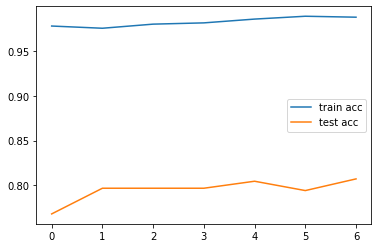

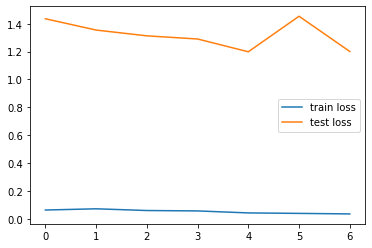

In [ ]:
plt.plot(hist2.history["accuracy"],label="train acc")
plt.plot(hist2.history["val_accuracy"],label="test acc")
plt.legend()
plt.show()

plt.plot(hist2.history["loss"],label="train loss")
plt.plot(hist2.history["val_loss"],label="test loss")
plt.legend()
plt.show()

In [ ]:
# Performance is almost similar. Let us try other options.

In [ ]:
# Model 3 with l2  regularization

In [ ]:
from tensorflow.keras import regularizers,optimizers

In [ ]:
transfer_mobnet3=Sequential([mobnet,
                          Flatten(),
                          Dense(256,activation="relu"),
                          BatchNormalization(),
                          Dense(4,activation="softmax",kernel_regularizer=regularizers.l2(0.1))
                          ])

In [ ]:
transfer_mobnet3.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
cb1=[EarlyStopping(monitor="val_loss",patience=2,mode="min",min_delta=0.001)]
hist3=transfer_mobnet3.fit(training_set,
                  steps_per_epoch=2870//32,
                  epochs=20,
                  batch_size=16,
                  validation_data=test_set,
                  validation_steps=394//32,
                  callbacks=[cb1])

Epoch 1/20
89/89 [==============================] - 42s 458ms/step - loss: 1.0948 - accuracy: 0.8280 - val_loss: 1.4332 - val_accuracy: 0.7370
Epoch 2/20
89/89 [==============================] - 40s 449ms/step - loss: 0.4636 - accuracy: 0.9292 - val_loss: 0.9343 - val_accuracy: 0.7812
Epoch 3/20
89/89 [==============================] - 40s 446ms/step - loss: 0.2897 - accuracy: 0.9524 - val_loss: 0.8763 - val_accuracy: 0.7995
Epoch 4/20
89/89 [==============================] - 40s 447ms/step - loss: 0.2152 - accuracy: 0.9700 - val_loss: 0.8630 - val_accuracy: 0.7760
Epoch 5/20
89/89 [==============================] - 40s 446ms/step - loss: 0.1808 - accuracy: 0.9750 - val_loss: 0.8175 - val_accuracy: 0.7943
Epoch 6/20
89/89 [==============================] - 39s 443ms/step - loss: 0.1481 - accuracy: 0.9831 - val_loss: 0.7518 - val_accuracy: 0.8203
Epoch 7/20
89/89 [==============================] - 40s 446ms/step - loss: 0.1402 - accuracy: 0.9863 - val_loss: 0.8785 - val_accuracy: 0.7839

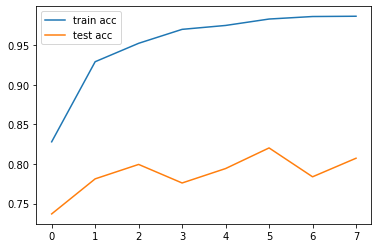

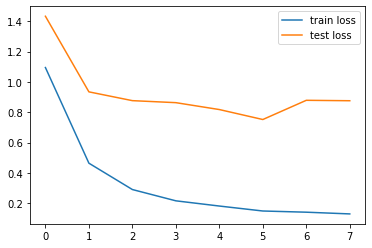

In [ ]:
plt.plot(hist3.history["accuracy"],label="train acc")
plt.plot(hist3.history["val_accuracy"],label="test acc")
plt.legend()
plt.show()

plt.plot(hist3.history["loss"],label="train loss")
plt.plot(hist3.history["val_loss"],label="test loss")
plt.legend()
plt.show()

In [ ]:
# Model 5 with varied learning_rate,l2 regularizer,hidden layer neurons as 64

In [ ]:
transfer_mobnet4=Sequential([mobnet,
                          Flatten(),
                          Dense(64,activation="relu"),
                          BatchNormalization(),
                          Dense(4,activation="softmax",kernel_regularizer=regularizers.l2(0.5))
                          ])

In [ ]:
adam_opti=optimizers.Adam(learning_rate=0.01)

transfer_mobnet4.compile(optimizer=adam_opti,loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
cb1=[EarlyStopping(monitor="val_loss",patience=2,mode="min",min_delta=0.001)]
hist4=transfer_mobnet4.fit(training_set,
                  steps_per_epoch=2870//32,
                  epochs=20,
                  batch_size=16,
                  validation_data=test_set,
                  validation_steps=394//32,
                  callbacks=[cb1])

Epoch 1/20
89/89 [==============================] - 47s 449ms/step - loss: 13.0247 - accuracy: 0.4535 - val_loss: 1.9102 - val_accuracy: 0.3958
Epoch 2/20
89/89 [==============================] - 40s 444ms/step - loss: 1.2813 - accuracy: 0.6790 - val_loss: 2.1217 - val_accuracy: 0.5781
Epoch 3/20
89/89 [==============================] - 39s 441ms/step - loss: 0.9462 - accuracy: 0.7914 - val_loss: 1.4388 - val_accuracy: 0.5677
Epoch 4/20
89/89 [==============================] - 39s 441ms/step - loss: 0.7213 - accuracy: 0.8305 - val_loss: 1.3873 - val_accuracy: 0.6797
Epoch 5/20
89/89 [==============================] - 39s 440ms/step - loss: 0.5575 - accuracy: 0.8682 - val_loss: 1.2947 - val_accuracy: 0.7109
Epoch 6/20
89/89 [==============================] - 39s 437ms/step - loss: 0.4606 - accuracy: 0.8834 - val_loss: 1.0392 - val_accuracy: 0.6797
Epoch 7/20
89/89 [==============================] - 39s 437ms/step - loss: 0.3413 - accuracy: 0.9158 - val_loss: 1.4958 - val_accuracy: 0.716

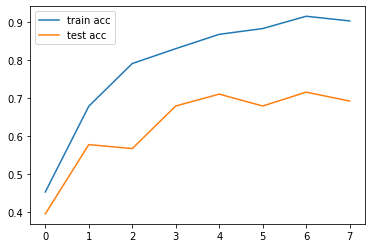

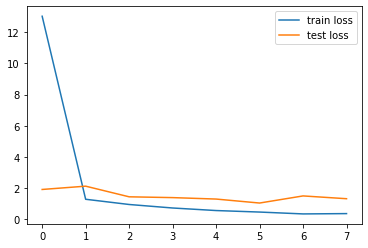

In [ ]:
plt.plot(hist4.history["accuracy"],label="train acc")
plt.plot(hist4.history["val_accuracy"],label="test acc")
plt.legend()
plt.show()

plt.plot(hist4.history["loss"],label="train loss")
plt.plot(hist4.history["val_loss"],label="test loss")
plt.legend()
plt.show()

In [ ]:
# Model 6 with GlobalAveragePooling2D, no hidden layer and dropout(0.6)

In [ ]:
transfer_mobnet5=Sequential([mobnet,
                          GlobalAveragePooling2D(),
                          Dropout(0.6),
                          Dense(4,activation="softmax")
                          ])

adam_opti=optimizers.Adam(learning_rate=0.01)

transfer_mobnet5.compile(optimizer=adam_opti,loss="categorical_crossentropy",metrics=["accuracy"])
cb1=[EarlyStopping(monitor="val_loss",patience=2,mode="min",min_delta=0.001)]
hist5=transfer_mobnet5.fit(training_set,
                  steps_per_epoch=2870//32,
                  epochs=20,
                  batch_size=16,
                  validation_data=test_set,
                  validation_steps=394//32,
                  callbacks=[cb1])

Epoch 1/20
89/89 [==============================] - 42s 452ms/step - loss: 1.3177 - accuracy: 0.6501 - val_loss: 1.8778 - val_accuracy: 0.5547
Epoch 2/20
89/89 [==============================] - 39s 442ms/step - loss: 0.9199 - accuracy: 0.7474 - val_loss: 1.7069 - val_accuracy: 0.6276
Epoch 3/20
89/89 [==============================] - 39s 443ms/step - loss: 0.9338 - accuracy: 0.7629 - val_loss: 2.0219 - val_accuracy: 0.6771
Epoch 4/20
89/89 [==============================] - 39s 441ms/step - loss: 0.9178 - accuracy: 0.7766 - val_loss: 1.7435 - val_accuracy: 0.6823


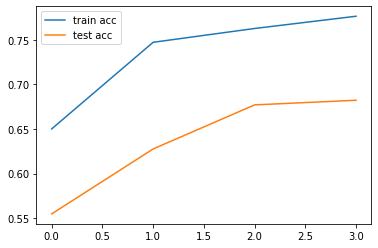

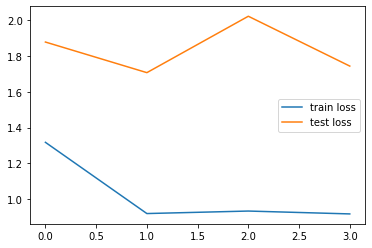

In [ ]:
plt.plot(hist5.history["accuracy"],label="train acc")
plt.plot(hist5.history["val_accuracy"],label="test acc")
plt.legend()
plt.show()

plt.plot(hist5.history["loss"],label="train loss")
plt.plot(hist5.history["val_loss"],label="test loss")
plt.legend()
plt.show()

In [ ]:
#Model 7 with Flatten and drop put 40%

In [ ]:
transfer_mobnet6=Sequential([mobnet,
                          Flatten(),
                          Dropout(0.4),
                          Dense(4,activation="softmax")
                          ])

transfer_mobnet6.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
cb1=[EarlyStopping(monitor="val_loss",patience=2,mode="min",min_delta=0.001)]
hist6=transfer_mobnet6.fit(training_set,
                  steps_per_epoch=2870//32,
                  epochs=20,
                  batch_size=16,
                  validation_data=test_set,
                  validation_steps=394//32,
                  callbacks=[cb1])

Epoch 1/20
89/89 [==============================] - 42s 453ms/step - loss: 2.2055 - accuracy: 0.7741 - val_loss: 6.6374 - val_accuracy: 0.6328
Epoch 2/20
89/89 [==============================] - 39s 444ms/step - loss: 1.0168 - accuracy: 0.8777 - val_loss: 5.6262 - val_accuracy: 0.7292
Epoch 3/20
89/89 [==============================] - 40s 444ms/step - loss: 0.7790 - accuracy: 0.9045 - val_loss: 4.4289 - val_accuracy: 0.7422
Epoch 4/20
89/89 [==============================] - 40s 447ms/step - loss: 0.7134 - accuracy: 0.9133 - val_loss: 4.0778 - val_accuracy: 0.7760
Epoch 5/20
89/89 [==============================] - 40s 446ms/step - loss: 0.5666 - accuracy: 0.9376 - val_loss: 4.9208 - val_accuracy: 0.7760
Epoch 6/20
89/89 [==============================] - 39s 443ms/step - loss: 0.6443 - accuracy: 0.9316 - val_loss: 5.8741 - val_accuracy: 0.7578


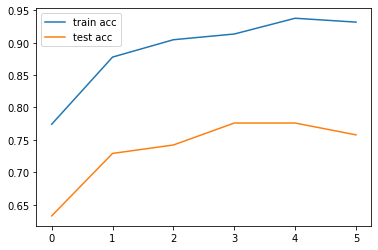

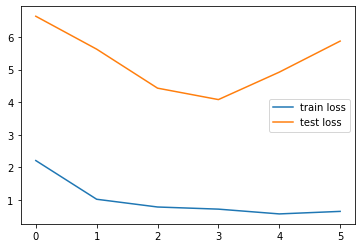

In [ ]:
plt.plot(hist6.history["accuracy"],label="train acc")
plt.plot(hist6.history["val_accuracy"],label="test acc")
plt.legend()
plt.show()

plt.plot(hist6.history["loss"],label="train loss")
plt.plot(hist6.history["val_loss"],label="test loss")
plt.legend()
plt.show()

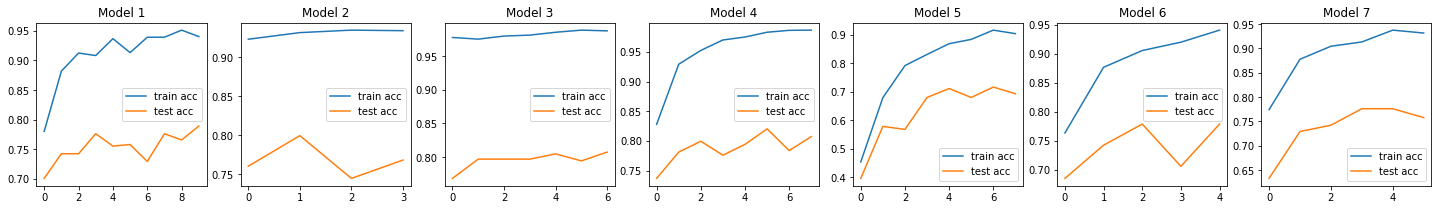

In [ ]:
# Accuracy of all the models till now

plt.rcParams["figure.figsize"]=[25,3]

plt.subplot(1,7,1)
plt.plot(hist.history["accuracy"],label="train acc")
plt.plot(hist.history["val_accuracy"],label="test acc")
plt.title("Model 1")
plt.legend()

plt.subplot(1,7,2)
plt.plot(hist1.history["accuracy"],label="train acc")
plt.plot(hist1.history["val_accuracy"],label="test acc")
plt.title("Model 2")
plt.legend()

plt.subplot(1,7,3)
plt.plot(hist2.history["accuracy"],label="train acc")
plt.plot(hist2.history["val_accuracy"],label="test acc")
plt.title("Model 3")
plt.legend()

plt.subplot(1,7,4)
plt.plot(hist3.history["accuracy"],label="train acc")
plt.plot(hist3.history["val_accuracy"],label="test acc")
plt.title("Model 4")
plt.legend()

plt.subplot(1,7,5)
plt.plot(hist4.history["accuracy"],label="train acc")
plt.plot(hist4.history["val_accuracy"],label="test acc")
plt.title("Model 5")
plt.legend()
plt.show()

plt.subplot(1,7,6)
plt.plot(hist5.history["accuracy"],label="train acc")
plt.plot(hist5.history["val_accuracy"],label="test acc")
plt.title("Model 6")
plt.legend()
plt.show()

plt.subplot(1,7,7)
plt.plot(hist6.history["accuracy"],label="train acc")
plt.plot(hist6.history["val_accuracy"],label="test acc")
plt.title("Model 7")
plt.legend()
plt.show()

In [ ]:
# Conclusion

# The best model with lower overfitting is "Model 5 with varied learning_rate,l2 regularizer,hidden layer neurons as 64".
# Tried different methods and combination to handle overfitting. They were:
  #1 Regularization(l2)
  #2 Dropout
  #3 Batch Normalization
  #4 Call Back(Early Stopping)
  #5 Varying the learning rate of the adam optimizer
  #6 Different batch sizes

# Next Steps:
  #1 Use different options in data augmentation which can make the model generic.
  #2 Try other Pre-trained models.